## Hierarchical Clustering and K means Semgmentation

<b> Book: introduction to statistical learning ISLR

In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
telco =  pd.read_csv("Telco.csv")

In [57]:
telco.sample(5)

,Calls,Intern,Text,Data,Age
396,1.94,0.11,589.53,4.48,18
539,1.29,0.10,436.24,3.20,15
855,2.15,0.09,23.03,0.58,40
711,4.66,0.95,18.44,1.77,40
243,1.66,1.09,177.87,1.47,32


In [58]:
telco.head(5)

,Calls,Intern,Text,Data,Age
0,1.12,0.19,23.92,0.18,60
1,1.08,0.22,17.76,0.23,54
2,3.54,0.26,289.79,1.99,34
3,1.09,0.21,19.15,0.21,61
4,1.04,0.24,20.33,0.20,56


In [59]:
telco.describe()

,Calls,Intern,Text,Data,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.629930,0.404840,225.021570,1.964750,37.776000
std,1.516563,0.377571,213.821509,1.374458,16.195311
min,0.850000,0.090000,17.010000,0.170000,12.000000
25%,1.490000,0.110000,20.770000,0.520000,24.000000
50%,2.040000,0.220000,190.525000,1.980000,35.000000
75%,3.492500,0.790000,449.437500,2.902500,51.000000
max,6.000000,1.200000,598.940000,4.790000,72.000000


### Scaling the Data

In [60]:
telco_scaled = telco.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [61]:
telco_scaled.head()

,Calls,Intern,Text,Data,Age
0,-0.996125,-0.569290,-0.940982,-1.299162,1.372936
1,-1.022513,-0.489795,-0.969806,-1.262765,1.002273
2,0.600387,-0.383802,0.303060,0.018380,-0.233271
3,-1.015916,-0.516293,-0.963302,-1.277324,1.434713
4,-1.048902,-0.436798,-0.957780,-1.284603,1.125827


In [62]:
telco_scaled.describe()

,Calls,Intern,Text,Data,Age
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.989964e-15,-2.852385e-15,1.069034e-15,-1.973387e-15,-2.446932e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.174248e+00,-8.342729e-01,-9.733149e-01,-1.306441e+00,-1.592368e+00
25%,-7.520297e-01,-7.812762e-01,-9.557213e-01,-1.051668e+00,-8.510422e-01
50%,-3.891861e-01,-4.897948e-01,-1.614142e-01,1.110083e-02,-1.714934e-01
75%,5.690510e-01,1.020609e+00,1.050073e+00,6.826104e-01,8.169412e-01
max,2.223288e+00,2.107040e+00,1.749616e+00,2.056566e+00,2.114262e+00


In [63]:
np.round(telco_scaled.mean(),2)

Calls    -0.0
Intern   -0.0
Text      0.0
Data     -0.0
Age      -0.0
dtype: float64

### Plotting a Dendrogram

In [64]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [65]:
Z = linkage(telco_scaled, 'complete')

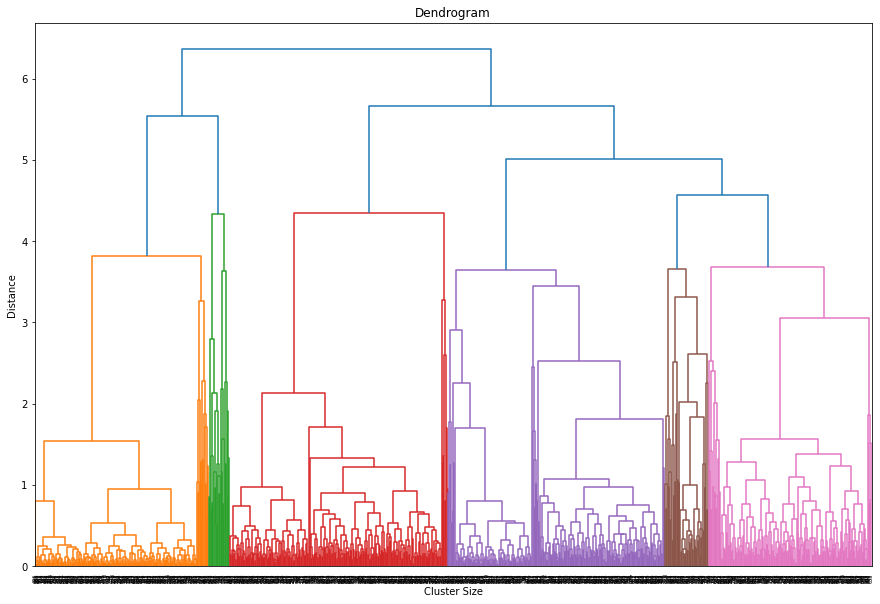

In [66]:
plt.figure(figsize=(15,10))
dendrogram(Z, leaf_rotation=90, leaf_font_size=5)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

In [67]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

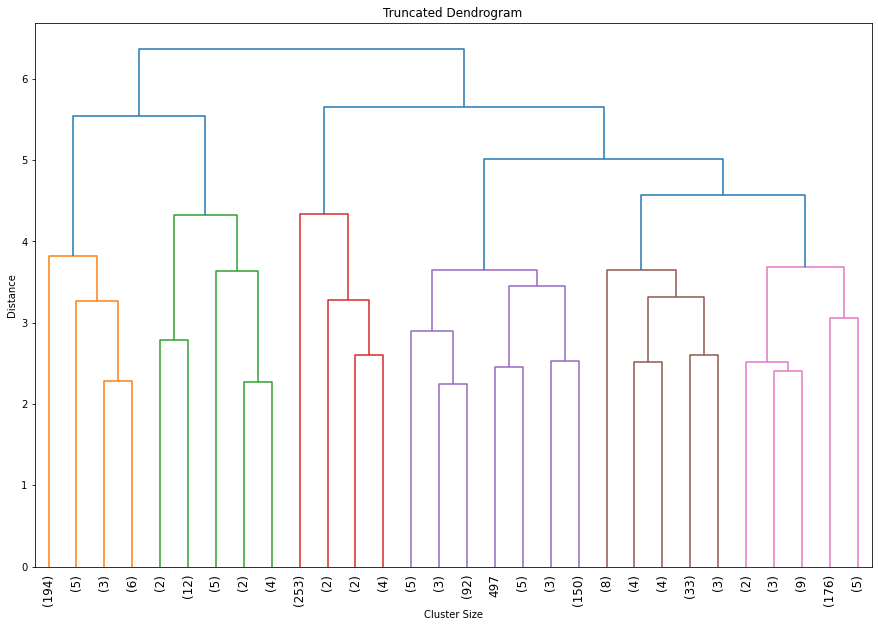

In [68]:
plt.figure(figsize=(15,10))
dendrogram(Z, truncate_mode='lastp',p=30, leaf_rotation=90, leaf_font_size=12)  # Leaf rotation: rotate the label on x axis
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

### Agglomerative Hierarchichal Clustering

In [69]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [70]:
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [71]:
hclust.fit(telco_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [79]:
hclust.labels_

array([3, 3, 4, 3, 3, 0, 3, 4, 0, 4, 0, 3, 3, 2, 0, 1, 0, 2, 0, 2, 2, 4,
       2, 2, 3, 4, 3, 0, 0, 0, 2, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 0, 3, 4,
       0, 4, 3, 3, 0, 0, 3, 4, 2, 4, 0, 0, 0, 2, 2, 0, 2, 2, 4, 4, 0, 2,
       2, 0, 4, 3, 0, 3, 0, 0, 0, 4, 0, 2, 4, 0, 0, 2, 0, 4, 0, 4, 2, 3,
       0, 1, 4, 3, 4, 4, 0, 2, 2, 4, 2, 2, 3, 3, 4, 2, 0, 4, 0, 3, 4, 3,
       3, 4, 3, 2, 1, 3, 2, 3, 4, 2, 3, 0, 4, 4, 1, 0, 0, 0, 3, 4, 4, 2,
       4, 3, 0, 3, 4, 2, 3, 3, 4, 0, 4, 3, 4, 4, 2, 4, 0, 0, 2, 2, 0, 2,
       4, 4, 0, 4, 2, 2, 4, 4, 1, 0, 4, 4, 2, 4, 0, 4, 0, 3, 0, 0, 2, 3,
       4, 3, 0, 2, 4, 2, 2, 4, 4, 0, 0, 4, 0, 2, 2, 4, 3, 4, 4, 0, 3, 2,
       0, 2, 2, 1, 3, 2, 4, 2, 4, 0, 3, 3, 1, 3, 0, 2, 4, 4, 1, 2, 0, 0,
       3, 0, 4, 4, 4, 4, 0, 4, 0, 4, 2, 1, 2, 0, 2, 3, 3, 4, 0, 1, 4, 2,
       2, 0, 2, 2, 2, 3, 0, 2, 2, 0, 3, 3, 3, 2, 0, 4, 0, 3, 4, 2, 0, 2,
       2, 3, 0, 3, 2, 2, 1, 4, 2, 0, 3, 3, 0, 0, 2, 2, 4, 0, 0, 0, 2, 0,
       2, 0, 2, 3, 2, 2, 4, 2, 3, 3, 0, 2, 2, 4, 0,

####  Grouping of Data


In [72]:
telco['Groups'] = hclust.labels_

In [73]:
telco.head()

,Calls,Intern,Text,Data,Age,Groups
0,1.12,0.19,23.92,0.18,60,3
1,1.08,0.22,17.76,0.23,54,3
2,3.54,0.26,289.79,1.99,34,4
3,1.09,0.21,19.15,0.21,61,3
4,1.04,0.24,20.33,0.20,56,3


In [76]:
telco.groupby('Groups').mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,4.472227,1.010486,82.832146,2.009190,43.149798
1,4.700400,0.432400,376.350800,1.545600,46.120000
2,1.763410,0.131456,507.732146,3.731073,19.003831
3,1.068846,0.238702,45.874567,0.355288,60.610577
4,2.800039,0.233514,204.993282,1.475405,32.424710


### K-means Clusttering

<b>Home Work: Compare the cluster solution with K=5 with the above agglomerative cluster solution

In [78]:
from sklearn.cluster import KMeans

In [90]:
km = KMeans(n_clusters=5, n_init=40)   #n_init will choose how many time you want  ur model to run with different centroid

In [81]:
# Fitting the model

km.fit(telco_scaled)

KMeans(n_clusters=5, n_init=40)

In [82]:
# Cluster Labels

km.labels_

array([2, 2, 4, 2, 2, 1, 2, 4, 1, 3, 1, 2, 2, 0, 1, 4, 4, 0, 1, 0, 0, 3,
       0, 0, 4, 4, 2, 1, 1, 1, 0, 1, 0, 2, 2, 4, 2, 2, 1, 1, 1, 4, 2, 4,
       1, 3, 2, 2, 1, 1, 2, 3, 0, 3, 1, 1, 1, 0, 0, 1, 0, 0, 3, 4, 4, 0,
       0, 1, 4, 2, 1, 2, 1, 1, 1, 3, 4, 0, 4, 4, 4, 0, 1, 4, 1, 4, 0, 2,
       1, 1, 3, 2, 3, 3, 1, 0, 0, 4, 0, 0, 2, 2, 4, 0, 1, 3, 4, 2, 4, 2,
       2, 4, 4, 1, 2, 2, 0, 2, 3, 0, 2, 1, 4, 3, 2, 1, 1, 1, 2, 4, 4, 0,
       4, 2, 4, 2, 4, 0, 2, 2, 4, 1, 4, 2, 4, 3, 0, 4, 1, 1, 0, 0, 4, 0,
       4, 3, 1, 4, 0, 0, 3, 3, 1, 1, 3, 4, 0, 4, 1, 4, 1, 2, 1, 1, 0, 2,
       4, 2, 1, 0, 4, 0, 0, 4, 4, 1, 1, 4, 1, 0, 0, 3, 2, 4, 4, 1, 2, 0,
       1, 0, 0, 4, 2, 0, 4, 0, 4, 4, 2, 2, 4, 2, 1, 0, 3, 4, 4, 0, 1, 4,
       2, 4, 3, 3, 4, 4, 1, 4, 1, 4, 0, 4, 0, 1, 0, 2, 2, 4, 1, 4, 4, 0,
       0, 4, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1, 3, 1, 2, 3, 0, 1, 0,
       0, 2, 1, 2, 0, 0, 4, 4, 0, 1, 2, 2, 1, 1, 0, 0, 4, 1, 4, 1, 0, 1,
       0, 1, 4, 2, 0, 0, 4, 0, 2, 2, 1, 0, 0, 4, 1,

In [83]:
# Withiin Group SSE
km.inertia_

785.9308775068441

In [84]:
# Calculating Withing Group SSE for different Cluster Solution

inertias = []
for k in [2,3,4,5,6,6]:
    km = KMeans(n_clusters=k,n_init=40)
    inertia = km.fit(telco_scaled).inertia_
    inertias.append(inertia)
inertias

[2930.8369934425,
 1495.7663272565956,
 988.9521483452316,
 785.9517944329599,
 606.5763375369532,
 606.5879609141563]

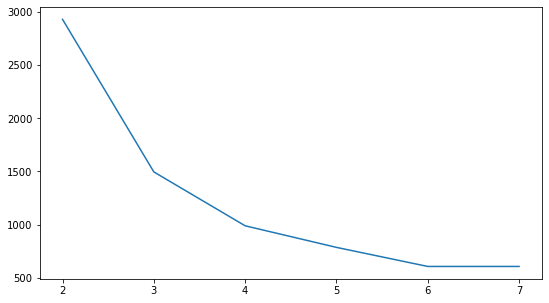

In [85]:
# Plotting the Scree Plot

plt.figure(figsize=(9,5))
plt.plot([2,3,4,5,6,7],inertias)

In [86]:
telco.head()

,Calls,Intern,Text,Data,Age,Groups
0,1.12,0.19,23.92,0.18,60,3
1,1.08,0.22,17.76,0.23,54,3
2,3.54,0.26,289.79,1.99,34,4
3,1.09,0.21,19.15,0.21,61,3
4,1.04,0.24,20.33,0.20,56,3


In [87]:
telco["Groups_Kmeans"] = km.labels_
telco.head()

,Calls,Intern,Text,Data,Age,Groups,Groups_Kmeans
0,1.12,0.19,23.92,0.18,60,3,4
1,1.08,0.22,17.76,0.23,54,3,4
2,3.54,0.26,289.79,1.99,34,4,5
3,1.09,0.21,19.15,0.21,61,3,4
4,1.04,0.24,20.33,0.20,56,3,4


In [89]:
telco.groupby("Groups_Kmeans").mean()[["Calls","Intern","Text","Data","Age"]]

,Calls,Intern,Text,Data,Age
Groups_Kmeans,,,,,
0,2.316774,0.108710,22.339032,0.518065,35.505376
1,1.711961,0.106627,509.623725,3.731373,18.956863
2,1.932812,0.955156,269.383906,1.818594,40.312500
3,5.089801,1.013980,45.116716,2.092388,45.114428
4,1.044091,0.205808,23.360505,0.234646,60.757576
5,3.303915,0.327249,328.336402,2.019312,31.544974


### Silhoutte score for cluster Analysis